# Estimating effect of multiple treatments

In [1]:
import numpy as np
import pandas as pd
import logging

import dowhy
from dowhy import CausalModel
import dowhy.datasets

import econml
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = dowhy.datasets.linear_dataset(10, num_common_causes=4, num_samples=10000,
                                    num_instruments=0, num_effect_modifiers=2,
                                     num_treatments=2,
                                    treatment_is_binary=False,
                                    num_discrete_common_causes=2,
                                    num_discrete_effect_modifiers=0,
                                    one_hot_encode=False)
df=data['df']
df.head()

,X0,X1,W0,W1,W2,W3,v0,v1,y
0,-0.124175,-0.186845,-1.724130,1.431111,2,0,-3.091154,-1.415971,-43.825403
1,-2.842135,-1.132385,0.384155,0.486554,1,2,10.143039,2.395090,-127.314940
2,-0.391815,0.958121,1.138954,-1.643331,1,1,4.643046,-0.536156,39.479516
3,-0.873968,-1.297226,-0.376918,-1.489406,1,3,6.786418,-1.775266,146.484902
4,-2.925996,0.066473,-1.691236,-0.863161,1,1,-3.386294,-6.167120,-221.136065


In [3]:
model = CausalModel(data=data["df"], 
                    treatment=data["treatment_name"], outcome=data["outcome_name"], 
                    graph=data["gml_graph"])

INFO:dowhy.causal_model:Model to find the causal effect of treatment ['v0', 'v1'] on outcome ['y']


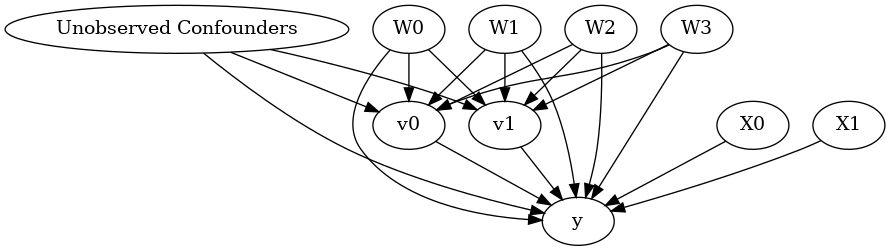

In [4]:
model.view_model()
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

In [5]:
identified_estimand= model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

INFO:dowhy.causal_identifier:Continuing by ignoring these unobserved confounders because proceed_when_unidentifiable flag is True.
INFO:dowhy.causal_identifier:Instrumental variables for treatment and outcome:[]
INFO:dowhy.causal_identifier:Frontdoor variables for treatment and outcome:[]


Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor1
Estimand expression:
    d                                
─────────(Expectation(y|W2,W0,W1,W3))
d[v₀  v₁]                            
Estimand assumption 1, Unconfoundedness: If U→{v0,v1} and U→y then P(y|v0,v1,W2,W0,W1,W3,U) = P(y|v0,v1,W2,W0,W1,W3)

### Estimand : 2
Estimand name: backdoor2
Estimand expression:
    d                                   
─────────(Expectation(y|W2,W0,X0,W1,W3))
d[v₀  v₁]                               
Estimand assumption 1, Unconfoundedness: If U→{v0,v1} and U→y then P(y|v0,v1,W2,W0,X0,W1,W3,U) = P(y|v0,v1,W2,W0,X0,W1,W3)

### Estimand : 3
Estimand name: backdoor3
Estimand expression:
    d                                   
─────────(Expectation(y|W2,W0,W1,X1,W3))
d[v₀  v₁]                               
Estimand assumption 1, Unconfoundedness: If U→{v0,v1} and U→y then P(y|v0,v1,W2,W0,W1,X1,W3,U) = P(y|v0,v1,W2,W0,W1,X1,W3)

### Estimand : 4
Estimand name: backdoor4 (Default)

## Linear model

Let us first see an example for a linear model. The control_value and treatment_value can be provided as a tuple/list when the treatment is multi-dimensional.

The interpretation is change in y when v0 and v1 are changed from (0,0) to (1,1).

In [6]:
linear_estimate = model.estimate_effect(identified_estimand, 
                                        method_name="backdoor.linear_regression",
                                       control_value=(0,0),
                                       treatment_value=(1,1),
                                       method_params={'need_conditional_estimates': False})
print(linear_estimate) 

INFO:dowhy.causal_estimator:b: y~v0+v1+W2+W0+X0+W1+X1+W3+v0*X0+v0*X1+v1*X0+v1*X1
INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator


*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

## Realized estimand
b: y~v0+v1+W2+W0+X0+W1+X1+W3+v0*X0+v0*X1+v1*X0+v1*X1
Target units: ate

## Estimate
Mean value: 12.451340507824497



You can estimate conditional effects, based on effect modifiers. 

In [7]:
linear_estimate = model.estimate_effect(identified_estimand, 
                                        method_name="backdoor.linear_regression",
                                       control_value=(0,0),
                                       treatment_value=(1,1))
print(linear_estimate) 

INFO:dowhy.causal_estimator:b: y~v0+v1+W2+W0+X0+W1+X1+W3+v0*X0+v0*X1+v1*X0+v1*X1
INFO:dowhy.causal_estimator:INFO: Using Linear Regression Estimator


*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

## Realized estimand
b: y~v0+v1+W2+W0+X0+W1+X1+W3+v0*X0+v0*X1+v1*X0+v1*X1
Target units: ate

## Estimate
Mean value: 12.451340507824497
### Conditional Estimates
__categorical__X0  __categorical__X1           
(-4.421, -1.185]   (-4.422000000000001, -1.353]   -12.354725
                   (-1.353, -0.786]                -2.843684
                   (-0.786, -0.28]                  2.985760
                   (-0.28, 0.323]                   9.293470
                   (0.323, 3.331]                  18.744462
(-1.185, -0.591]   (-4.422000000000001, -1.353]    -6.742414
                   (-1.353, -0.786]                 2.913217
                   (-0.786, -0.28]                  8.734612
                   (-0.28, 0.323]                  14.918588
                   (0.323, 3.331]                  24.805595
(-0.591, -0.0849]  (-4.422000000000001, -1.353]    -3.542468
                   (-1.353, -0.786]  

## More methods

You can also use methods from EconML or CausalML libraries that support multiple treatments. You can look at examples from the conditional effect notebook: https://microsoft.github.io/dowhy/example_notebooks/dowhy-conditional-treatment-effects.html

Propensity-based methods do not support multiple treatments currently. 
